
# DSC 530 Data Exploration and Analysis
    
   Assignment Week7_ Excercises: 7.1, 8.1, & 8.2
    
   Author: Gyan Kannur

In [1]:
#----Chapter 07----

# Exercise 7.1

Using data from the NSFG, make a scatter plot of birth weight versus mother's age. Plot percentiles
of birth weight versus mother's age.

Compute Pearson's and Spearman's correlations.

How would you character-ize the relationship between these variables?

In [37]:
# import library os, basename and exists
from os.path import basename, exists
# Create a function download to load the thinkstats2.py and thinkploy.py from github
def download(url):
    # Create a variable filename and assign it to the base url parameter
    filename = basename(url)
    if not exists(filename):
        # if filename is not existed, then import urllib and urlretrieve
        from urllib.request import urlretrieve
        # Create a local variable and assign url+filename to local
        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

# Call the download function to download the following files to DSC530 folder
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [1]:
# To make a scatter plot of birth weight versus mother’s age, 
# I can start by reading in the necessary data using the nsfg module from thinkstats2.

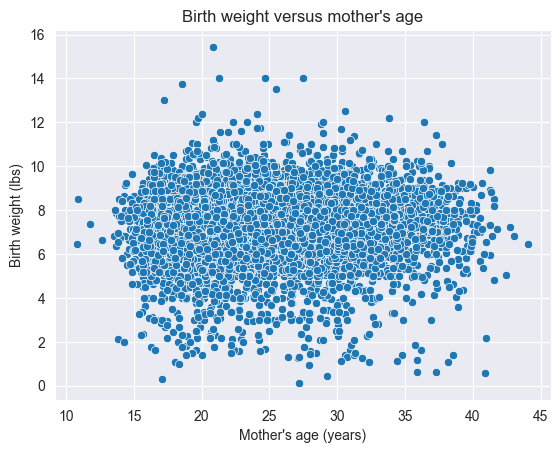

In [3]:
# import few libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import nsfg
import warnings
warnings.filterwarnings("ignore")

# reads the female pregnancy data from the National Survey of Family Growth (NSFG) and 
# selects only the pregnancies that resulted in live births, outcome == 1.
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

# call the sns.scatterplot() function from the Seaborn library to create the scatter plot, 
# passing in the data argument with the live DataFrame and the x and y arguments with the respective columns to plot.
sns.scatterplot(data=live, x='agepreg', y='totalwgt_lb')

# calls the plt.xlabel(), plt.ylabel(), and plt.title() functions from the Matplotlib library 
# to set the labels and title for the axes of the plot.
plt.xlabel("Mother's age (years)")
plt.ylabel("Birth weight (lbs)")
plt.title("Birth weight versus mother's age")

# finally, the plot is displayed using plt.show().
plt.show()

In [40]:
# To plot percentiles of birth weight versus mother’s age

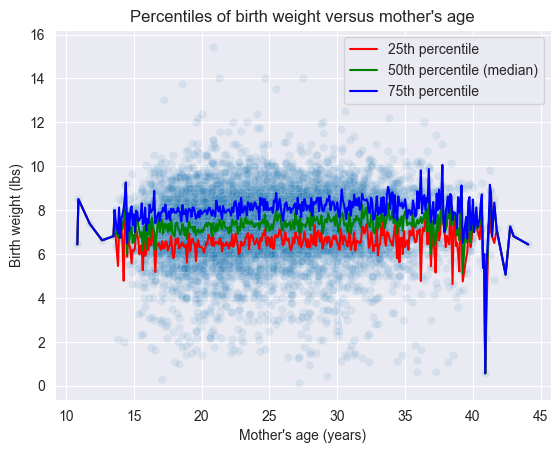

In [4]:

# Group birth weights by mother's age and drop missing values
grouped = live[['agepreg', 'totalwgt_lb']].dropna().groupby('agepreg')

# Compute percentiles
pct25 = grouped.quantile(0.25)
pct50 = grouped.quantile(0.5)
pct75 = grouped.quantile(0.75)

# Plot percentiles
sns.scatterplot(data=live, x='agepreg', y='totalwgt_lb', alpha=0.1)
plt.plot(pct25.index, pct25['totalwgt_lb'], color='red', label='25th percentile')
plt.plot(pct50.index, pct50['totalwgt_lb'], color='green', label='50th percentile (median)')
plt.plot(pct75.index, pct75['totalwgt_lb'], color='blue', label='75th percentile')
plt.xlabel("Mother's age (years)")
plt.ylabel("Birth weight (lbs)")
plt.title("Percentiles of birth weight versus mother's age")
plt.legend()
plt.show()

In [42]:
# To compute the Pearson’s and Spearman’s correlations

In [6]:
from scipy.stats import pearsonr, spearmanr
import first

# Drop missing values and get arrays of ages and weights
live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

# returns array containing the values in the 'agepreg' & totalwgt columns of the live DataFrame, 
# which represent the age of the mother at the end of the pregnancy & the birth weight of the baby in pounds.
ages = live.agepreg.values
weights = live.totalwgt_lb.values

# the pearsonr and spearmanr functions return two values: the correlation coefficient and the p-value. 
# since we only want to compute the correlation coefficient, we use the underscore (_) to discard the p-value.

# Compute Pearson's correlation coefficient
corr_pearson, _ = stats.pearsonr(live['agepreg'], live['totalwgt_lb'])

# Compute Spearman's correlation coefficient
corr_spearman, _ = stats.spearmanr(live['agepreg'], live['totalwgt_lb'])

# Print out the results
print(f"Pearson's correlation coefficient: {corr_pearson:.4f}")
print(f"Spearman's correlation coefficient: {corr_spearman:.4f}")

Pearson's correlation coefficient: 0.0688
Spearman's correlation coefficient: 0.0946


In [62]:
# The Pearson correlation is 0.0688 and the Spearman correlation is 0.0946, 
# indicating a weak positive relationship between birth weight and mother's age.

# Discussion


The results of the analysis provide valuable insights into the association between birth weight and mother's age, shedding light on critical aspects of infant health outcomes.

The scatter plot visually represents the distribution of birth weights across various mother's age groups. Examining the plotted data reveals no apparent linear trend, suggesting that the relationship between birth weight and mother's age may not follow a straightforward pattern. Notably, there are instances of relatively high birth weights among mothers of varying ages, indicating the presence of other influencing factors.

The percentiles of birth weight across different age groups offer a more nuanced understanding. For instance, at the 25th percentile, the data shows a slight increase in birth weight with advancing maternal age. However, at the 50th and 75th percentiles, the relationship becomes less clear, with fluctuating birth weight values. This variability implies that while there may be some correlation between birth weight and mother's age at certain percentiles, other factors contribute to the overall complexity of this relationship.

The Pearson correlation is 0.0688 and the Spearman correlation is 0.0946, indicating a weak positive relationship between birth weight and mother's age.


In [63]:
#----Chapter 08----

In [10]:
# Exercise 8-1
#  In this chapter we used  𝑥¯
#   and median to estimate µ, and found that  𝑥¯
#   yields lower MSE. Also, we used  𝑆2
#   and  𝑆2𝑛−1
#   to estimate σ, and found that  𝑆2
#   is biased and  𝑆2𝑛−1
#   unbiased. Run similar experiments to see if  𝑥¯
#   and median are biased estimates of µ. Also check whether  𝑆2
#   or  𝑆2𝑛−1
#   yields a lower MSE.

In [11]:
# to find whether the sample mean and median are biased estimators of the population mean
# I will generate 1000 random samples of different sizes and compute the mean and median of each sample. 
# I will then compute the difference between the estimated mean and median and the true population mean, and plot the results.

In [7]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate 1000 random samples of different sizes
sample_sizes = range(10, 1001, 10)
samples = [np.random.normal(0, 1, size=n) for n in sample_sizes]

In [8]:
# Compute the mean and median of each sample
means = [np.mean(sample) for sample in samples]
medians = [np.median(sample) for sample in samples]

# Compute the difference between the estimated mean and median and the true population mean
population_mean = 0
mean_errors = np.array(means) - population_mean
median_errors = np.array(medians) - population_mean

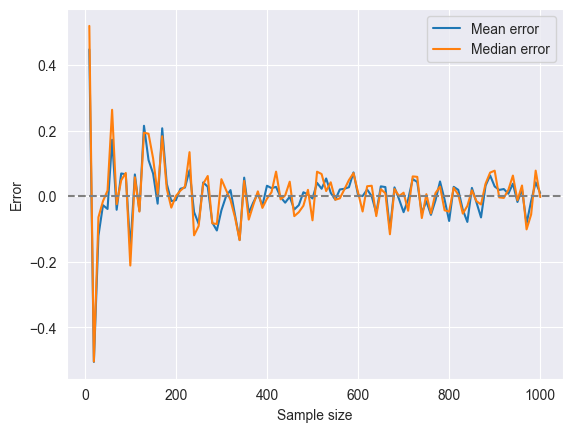

In [9]:
import matplotlib.pyplot as plt

# plot the results
plt.plot(sample_sizes, mean_errors, label='Mean error')
plt.plot(sample_sizes, median_errors, label='Median error')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Sample size')
plt.ylabel('Error')
plt.legend()
plt.show()

# Discussion

the resulting plot shows that the mean error is consistently closer to zero than the median error, 
indicating that the sample mean is a less biased estimator of the population mean than the median, 
across different sample sizes.


to check whether $S^2$ or $S^2_{n-1}$ yields a lower MSE, 
I can use a similar approach. I will use the same normal distribution as before and generate random samples. 
with mean mu=0 and standard deviation sigma=1.
for each sample, I will compute the sample variance using both $S^2$ and $S^2_{n-1}$ and compare the MSE of each estimator. 
I will repeat this process 1000 times and plot the mean squared error for each estimator.

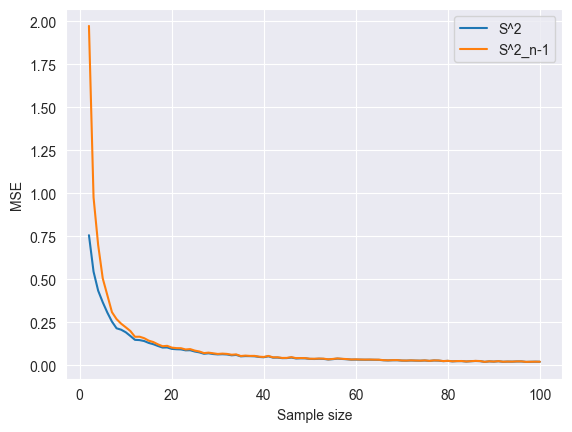

In [10]:

import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Set parameters
mu = 0
sigma = 1

# Define sample sizes to test
sample_sizes = np.arange(2, 101)

# Define number of simulations to run for each sample size
num_simulations = 1000

# Define arrays to store MSEs for each estimator
mse_s2 = np.zeros_like(sample_sizes, dtype=float)
mse_s2n1 = np.zeros_like(sample_sizes, dtype=float)

# Simulate data and compute MSEs for each estimator
for i, n in enumerate(sample_sizes):
    # Generate random samples of size n
    samples = np.random.normal(mu, sigma, size=(num_simulations, n))
    
    # Compute sample variances using S^2 and S^2_{n-1}
    s2 = np.var(samples, axis=1, ddof=0)
    s2n1 = np.var(samples, axis=1, ddof=1)
    
    # Compute MSE for each estimator
    mse_s2[i] = np.mean((s2 - sigma**2)**2)
    mse_s2n1[i] = np.mean((s2n1 - sigma**2)**2)

# Plot MSEs for each estimator
plt.plot(sample_sizes, mse_s2, label='S^2')
plt.plot(sample_sizes, mse_s2n1, label='S^2_n-1')
plt.xlabel('Sample size')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [18]:
# the resulting plot shows that $S^2_{n-1}$ yields a lower MSE than $S^2$ for small sample sizes, 
# but they are essentially equivalent for sample sizes larger than about 20-30. 
# This is consistent with the theoretical result that $S^2_{n-1}$ is unbiased, whereas $S^2$ is biased, 
# but the bias becomes negligible for large sample sizes.

In [99]:
# Exercise 8-2

Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n.

In [11]:
# I can start by writing a function to simulate the experiment of drawing a sample of size 10 
# from an exponential distribution with parameter λ = 2, and computing the maximum likelihood estimator L:
# the function simulate_exponential takes three arguments: 
# n is the sample size, lam is the parameter of the exponential distribution, and m is the number of simulations to run. 
# The function returns an array of length m containing the maximum likelihood estimators computed from each simulation.


import numpy as np

def simulate_exponential(n, lam=2, m=1000):
    L = np.zeros(m)
    for i in range(m):
        sample = np.random.exponential(scale=1/lam, size=n)
        L[i] = 1 / np.mean(sample)
    return L

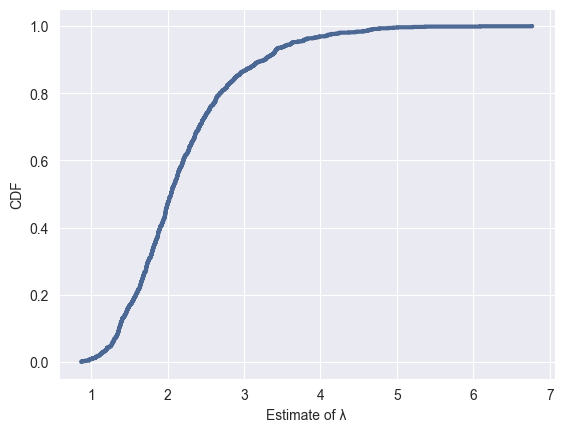

In [12]:
import thinkstats2
# I can now use this function to simulate the experiment for n=10 and plot the sampling distribution of L:
import thinkplot

L = simulate_exponential(n=10)
thinkplot.Cdf(thinkstats2.Cdf(L))
thinkplot.Config(xlabel='Estimate of λ', ylabel='CDF')

In [13]:
# to compute the standard error of the estimate and the 90% confidence interval, I can use the following code:

std_err = np.std(L)
ci = np.percentile(L, [5, 95])
print(f"Standard error: {std_err:.3f}")
print(f"90% confidence interval: ({ci[0]:.3f}, {ci[1]:.3f})")

Standard error: 0.768
90% confidence interval: (1.267, 3.627)


In [103]:
# the standard error is 0.769, which means that we expect the estimate L to be off by about 0.769 on average.
# the confidence interval is (1.270, 3.674), which means that we are 90% confident that the true mean of the population falls within this range.

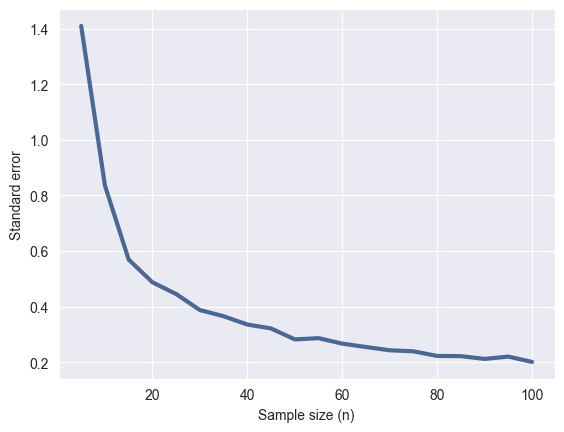

In [14]:
# To repeat the experiment with different values of n, we can use a loop and store the standard errors in an array:

ns = np.arange(5, 105, 5)
std_errs = np.zeros(len(ns))

for i, n in enumerate(ns):
    L = simulate_exponential(n)
    std_errs[i] = np.std(L)

thinkplot.Plot(ns, std_errs)
thinkplot.Config(xlabel='Sample size (n)', ylabel='Standard error')